In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import scipy.stats as stats
from scipy.stats import gaussian_kde
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import LinearRing,Polygon

sns.set(style="whitegrid")

# is_in_region(point, bot left grid, top left grid, top right grid, bot right grid )
def is_in_region(x, y, a1, a2, b1, b2, c1, c2, d1, d2):
    point = Point(x,y)
    polygon = Polygon([(a1,a2), (b1,b2), (c1,c2), (d1,d2)])
    return polygon.contains(point)

### Data I/O

### Read in EJ file

In [3]:
# later time step
nn = 350
# step interval
dn = 10

filename=('./output/run5018_EJ_spiral_t%3.3d_t%3.3d.dat')%(nn, nn+dn)
x,y,ang,da,Ej,dEj = np.loadtxt(filename,usecols=[0,1,2,3,4,5],unpack=True)

omega_bar = 0.542
omega_spiral = 0.228

CR_bar = 3.2
CR_spiral = 7.0
Sep = 5.0

R_max = 8.

Ej_min = -5.
Ej_max = 0.
dEj_min = -1.5
dEj_max = 1.5

### 1. plot E<sub>J</sub> - &Delta;E<sub>J</sub>, and dissect it into different regions

### E<sub>J</sub> in the bar frame

(-1, 2)

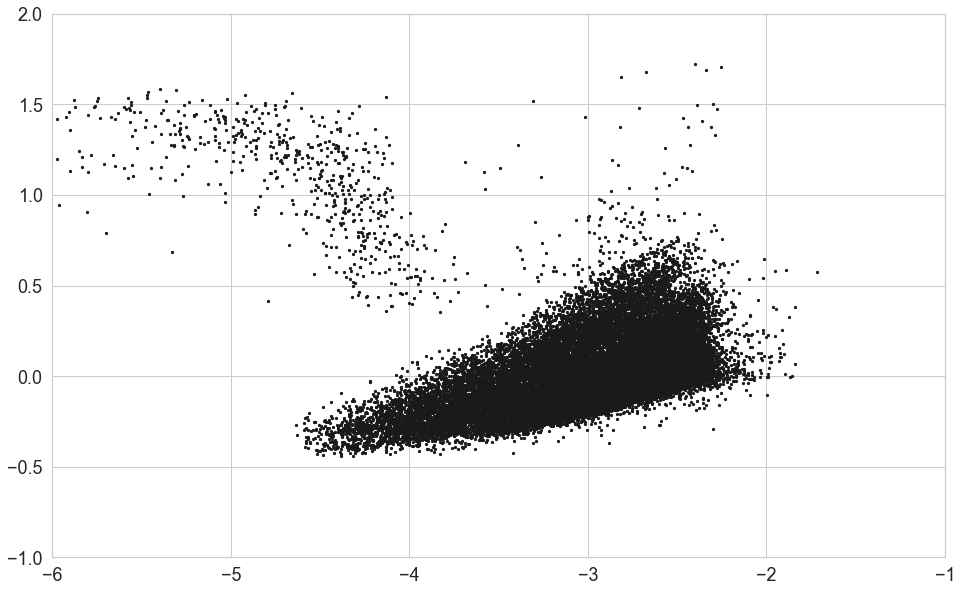

In [4]:
# test results
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

plt.scatter(Ej, dEj/Ej, c='k', s=5)
plt.xlim(-6, -1)
plt.ylim(-1, 2)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Change of $E_{J}$ inside bar corotation from T = 350 to 360')

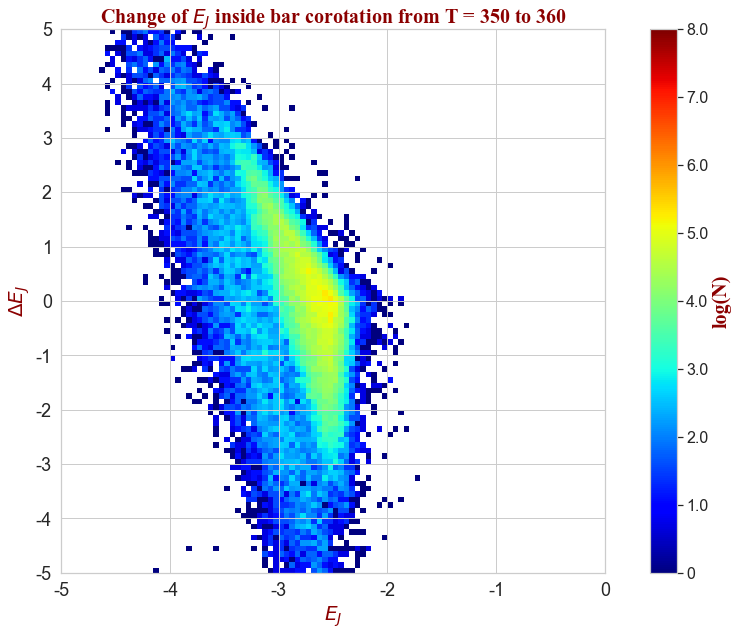

In [5]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
       }

#extent
extent=(0,1,0,1)
#cmap
cmap=plt.cm.get_cmap('jet')
#normalize colorbar
#norm= matplotlib.colors.Normalize(vmin=0,vmax=5)
#Ej, \delta_{Ej}-plane
H,xedges,yedges = np.histogram2d(dEj,Ej,bins=(100,100),range=([dEj_min, dEj_max],[Ej_min,Ej_max]))
X,Y = np.meshgrid(xedges,yedges)

gci=plt.imshow(np.log(H),interpolation='nearest',extent=extent,origin='low',cmap=cmap)

# plot grid
plt.grid(True)

# plot polygons
#ax.plot(bx, by, linewidth = 2.)
#ax.plot(cr1x, cr1y, linewidth = 2.)
#ax.plot(cr2x, cr2y, linewidth = 2.)
#ax.plot(spx, spy, linewidth = 2.)

#set ticks
ax = plt.gca()
#ax.set_xlabel('X')
ax.set_xticks(np.linspace(0,1,6))
ax.set_xticklabels( ('-5', '-4', '-3', '-2', '-1', '0'))
#ax.set_ylabel('Y')
ax.set_yticks(np.linspace(0,1,11))
ax.set_yticklabels( ('-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5'))

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}$',fontdict=font)

#colorbar
cbar = fig.colorbar(gci)
cbar.set_label('log(N)',fontdict=font)
cbar.set_ticks(np.linspace(0,8,9))
cbar.set_ticklabels( ('0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'))
cbar.ax.tick_params(labelsize=16)
plt.clim(0,8)

#title
titleStr='Change of $E_{J}$ inside bar corotation from T = '+str(nn)+' to '+str(nn+dn)
plt.title(titleStr,fontdict=font)

#savefig
#figname1='./output/dEj_bar_t'+str(nn)+'_to_'+str(nn+dn)+'_color.png'
#plt.savefig(figname1)

[[2.08276444e-62 1.55974623e-56 5.52156179e-51 ... 1.61715659e-11
  5.67625096e-10 9.40184169e-09]
 [2.08295598e-62 1.55988235e-56 5.52201778e-51 ... 1.61721437e-11
  5.67642711e-10 9.40208925e-09]
 [2.08314721e-62 1.56001824e-56 5.52247294e-51 ... 1.61727190e-11
  5.67660239e-10 9.40233536e-09]
 ...
 [2.09990963e-62 1.57187049e-56 5.56195231e-51 ... 1.62160003e-11
  5.68925544e-10 9.41908457e-09]
 [2.10007116e-62 1.57198403e-56 5.56232800e-51 ... 1.62163359e-11
  5.68934645e-10 9.41919095e-09]
 [2.10023239e-62 1.57209734e-56 5.56270284e-51 ... 1.62166689e-11
  5.68943657e-10 9.41929587e-09]]


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not k..

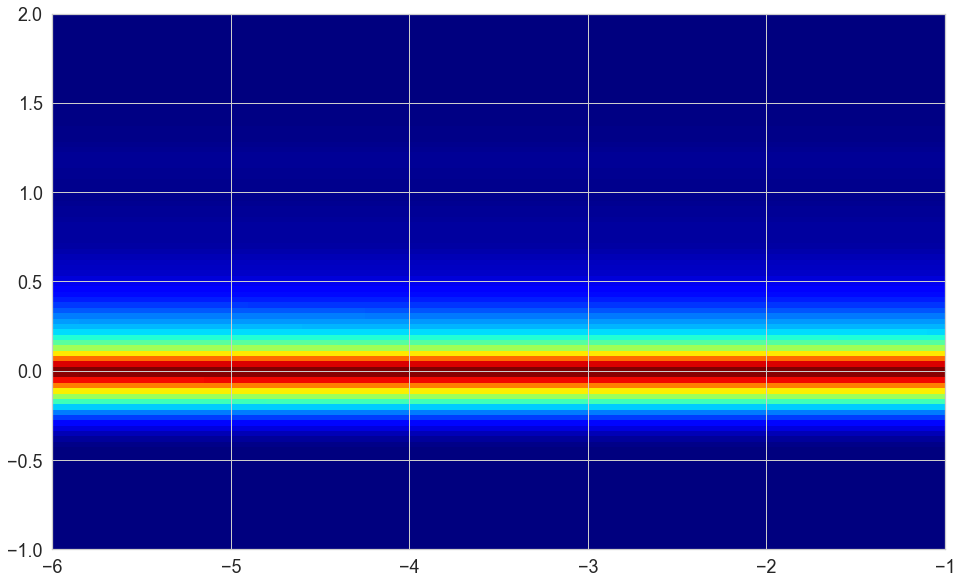

In [6]:
fig = plt.figure(figsize=(16, 10), dpi=72, facecolor="white")
ax = plt.subplot(111)
ax.cla()
ax.tick_params(direction='out',labelsize=18)

# set font
font = {'family' : 'Times New Roman',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 20,
        'serif'  : 'Times'
       }

#cmap
cmap=plt.cm.get_cmap('jet')

# kernel density estimate

xmin = -6
xmax = -1
ymin = -1
ymax = 2

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
value = np.vstack([Ej,dEj/Ej])
kernel = gaussian_kde(value, bw_method = 'silverman')

Z = np.reshape(kernel(positions).T, X.shape)

## scatter plot
#gci = plt.scatter(Ej, dEj/Ej, c=kernel, s=10, edgecolor='')
gci = ax.imshow(np.rot90(Z), cmap=cmap, extent=[xmin, xmax, ymin, ymax])
ax.plot(Ej, dEj/Ej, markersize=1)
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])

plt.grid(True)

#set labels
ax.set_xlabel('$E_{J}$',fontdict=font)
ax.set_ylabel('$\Delta E_{J}/E_{J}$',fontdict=font)

#title
titleStr='Change of $E_{J}$ inside bar corotation from T = '+str(nn)+' to '+str(nn+dn)
plt.title(titleStr,fontdict=font)

plt.show()